In [1]:
!pip install -U imbalanced-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler

In [3]:
df = pd.read_csv("diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

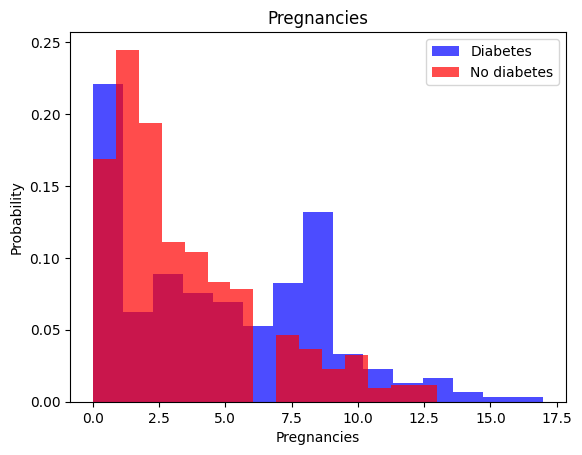

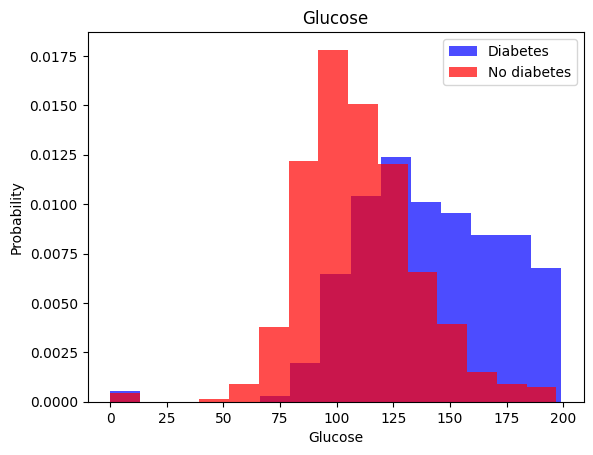

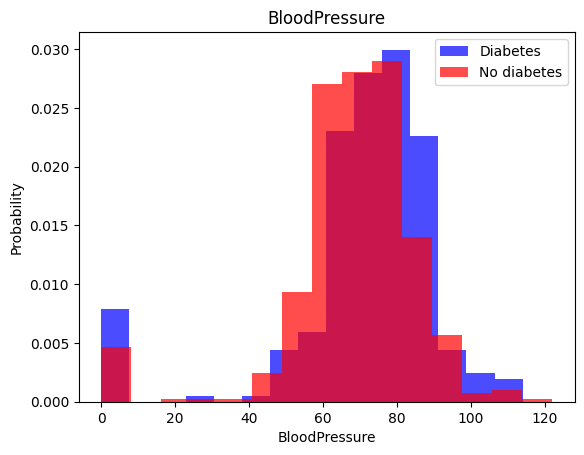

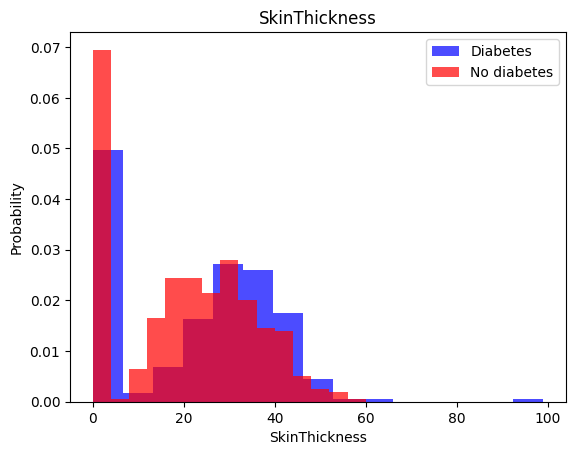

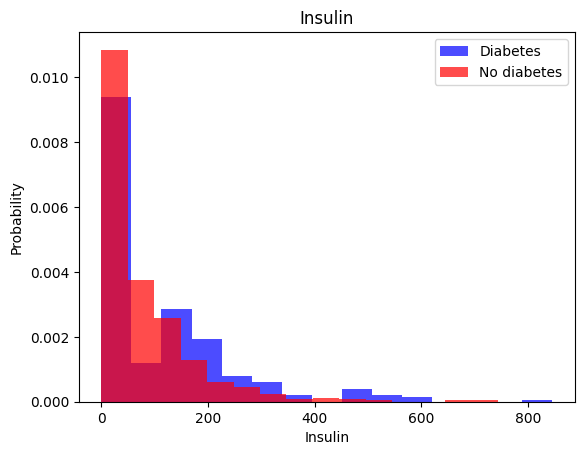

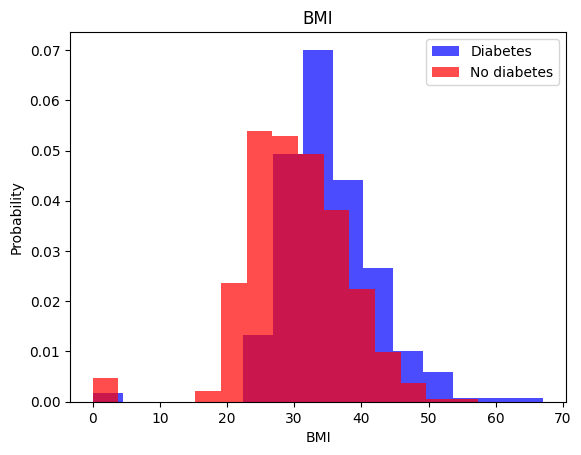

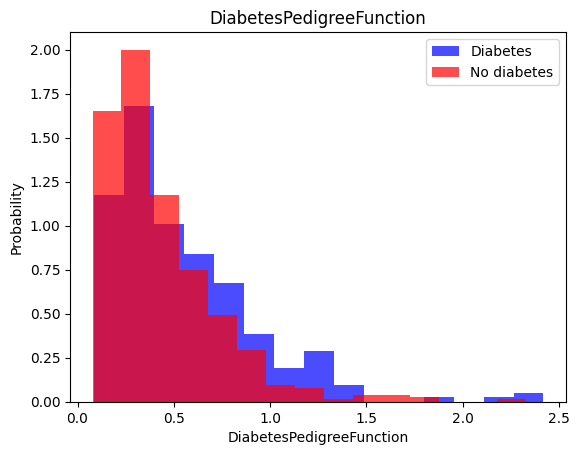

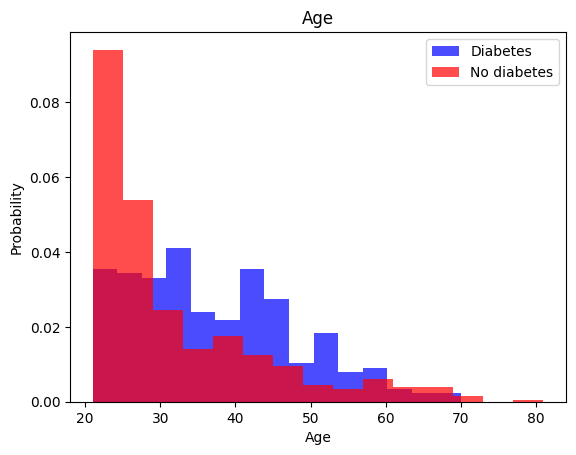

In [6]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df['Outcome']==1][label], color='blue', label="Diabetes", alpha=0.7, density=True, bins=15)
  plt.hist(df[df['Outcome']==0][label], color='red', label="No diabetes", alpha=0.7, density=True, bins=15)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [7]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [8]:
X.shape, y.shape

((768, 8), (768,))

In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [10]:
over = RandomOverSampler()
X, y = over.fit_resample(X, y)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [11]:
len(transformed_df[transformed_df["Outcome"]==1]), len(transformed_df[transformed_df["Outcome"]==0])

(500, 500)

In [12]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [13]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(16, activation='relu'), # if x <= 0 --> 0, x > 0 --> x
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [15]:
model.evaluate(X_train, y_train)

19/19 [==============================] - 1s 2ms/step - loss: 0.6819 - accuracy: 0.5783


[0.6818880438804626, 0.57833331823349]

In [16]:
model.evaluate(X_valid, y_valid)

7/7 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.5650


[0.6938174962997437, 0.5649999976158142]

In [17]:
model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
38/38 [==============================] - 1s 5ms/step - loss: 0.6579 - accuracy: 0.6083 - val_loss: 0.6392 - val_accuracy: 0.6450
Epoch 2/20
38/38 [==============================] - 0s 3ms/step - loss: 0.6202 - accuracy: 0.6667 - val_loss: 0.6034 - val_accuracy: 0.6950
Epoch 3/20
38/38 [==============================] - 0s 5ms/step - loss: 0.5941 - accuracy: 0.6883 - val_loss: 0.5725 - val_accuracy: 0.7450
Epoch 4/20
38/38 [==============================] - 0s 4ms/step - loss: 0.5748 - accuracy: 0.6917 - val_loss: 0.5467 - val_accuracy: 0.7500
Epoch 5/20
38/38 [==============================] - 0s 5ms/step - loss: 0.5550 - accuracy: 0.7017 - val_loss: 0.5284 - val_accuracy: 0.7550
Epoch 6/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5422 - accuracy: 0.7150 - val_loss: 0.5131 - val_accuracy: 0.7750
Epoch 7/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5317 - accuracy: 0.7317 - val_loss: 0.5004 - val_accuracy: 0.7650
Epoch 8/20
38/38 [==

In [18]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.4835 - accuracy: 0.7700


[0.48354390263557434, 0.7699999809265137]